In [1]:
import psycopg2
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv("db_credentials.env")

conn = psycopg2.connect(
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    host=os.getenv("DB_HOST"),
    port=os.getenv("DB_PORT"),
    dbname=os.getenv("DB_NAME")
)

df = pd.read_sql_query("SELECT * FROM electricity_meter;", conn)
conn.close()

df

/var/folders/39/mwlmj6614j1ck_p4g29fw8zc0000gn/T/ipykernel_16866/1850329838.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM electricity_meter;", conn)


,id,created_at,active_tariff,active_power_w,total_power_import_kwh,total_gas_m3
0,1,2025-04-11 11:30:24.164061+00:00,1,196,NaN,NaN
1,2,2025-04-11 11:31:33.349774+00:00,1,103,NaN,NaN
2,3,2025-04-11 11:32:55.929347+00:00,1,99,NaN,NaN
3,4,2025-04-11 11:40:54.900280+00:00,1,103,NaN,NaN
4,5,2025-04-11 12:59:15.113278+00:00,1,111,NaN,NaN
...,...,...,...,...,...,...
34305,34306,2025-08-14 12:22:23.242477+00:00,1,586,4588.624,1257.235
34306,34307,2025-08-14 12:27:23.208889+00:00,1,592,4588.673,1257.235
34307,34308,2025-08-14 12:32:23.205069+00:00,1,140,4588.700,1257.235
34308,34309,2025-08-14 12:37:23.229843+00:00,1,106,4588.708,1257.235


In [2]:
import pytz

# Step 1: Make sure it's timezone-aware
df["created_at"] = pd.to_datetime(df["created_at"], utc=True)

# Step 2: Convert to Belgium time (automatic handling of daylight saving)
belgium_tz = pytz.timezone("Europe/Brussels")
df["created_at_be"] = df["created_at"].dt.tz_convert(belgium_tz)

df

,id,created_at,active_tariff,active_power_w,total_power_import_kwh,total_gas_m3,created_at_be
0,1,2025-04-11 11:30:24.164061+00:00,1,196,NaN,NaN,2025-04-11 13:30:24.164061+02:00
1,2,2025-04-11 11:31:33.349774+00:00,1,103,NaN,NaN,2025-04-11 13:31:33.349774+02:00
2,3,2025-04-11 11:32:55.929347+00:00,1,99,NaN,NaN,2025-04-11 13:32:55.929347+02:00
3,4,2025-04-11 11:40:54.900280+00:00,1,103,NaN,NaN,2025-04-11 13:40:54.900280+02:00
4,5,2025-04-11 12:59:15.113278+00:00,1,111,NaN,NaN,2025-04-11 14:59:15.113278+02:00
...,...,...,...,...,...,...,...
34305,34306,2025-08-14 12:22:23.242477+00:00,1,586,4588.624,1257.235,2025-08-14 14:22:23.242477+02:00
34306,34307,2025-08-14 12:27:23.208889+00:00,1,592,4588.673,1257.235,2025-08-14 14:27:23.208889+02:00
34307,34308,2025-08-14 12:32:23.205069+00:00,1,140,4588.700,1257.235,2025-08-14 14:32:23.205069+02:00
34308,34309,2025-08-14 12:37:23.229843+00:00,1,106,4588.708,1257.235,2025-08-14 14:37:23.229843+02:00


In [3]:
df["date_be"] = df["created_at_be"].dt.date
df["time_be"] = df["created_at_be"].dt.time
df["hour_be"] = df["created_at_be"].dt.hour
df["minute_be"] = df["created_at_be"].dt.minute
df["day_of_week"] = df["created_at_be"].dt.day_name()  # e.g., "Monday"
df["day_of_month"] = df["created_at_be"].dt.day
df["month"] = df["created_at_be"].dt.month
df["month_name"] = df["created_at_be"].dt.month_name()
df["year"] = df["created_at_be"].dt.year
df["week_number"] = df["created_at_be"].dt.isocalendar().week  # ISO week n
df.drop(columns=["id"], inplace=True)
df

,created_at,active_tariff,active_power_w,total_power_import_kwh,total_gas_m3,created_at_be,date_be,time_be,hour_be,minute_be,day_of_week,day_of_month,month,month_name,year,week_number
0,2025-04-11 11:30:24.164061+00:00,1,196,NaN,NaN,2025-04-11 13:30:24.164061+02:00,2025-04-11,13:30:24.164061,13,30,Friday,11,4,April,2025,15
1,2025-04-11 11:31:33.349774+00:00,1,103,NaN,NaN,2025-04-11 13:31:33.349774+02:00,2025-04-11,13:31:33.349774,13,31,Friday,11,4,April,2025,15
2,2025-04-11 11:32:55.929347+00:00,1,99,NaN,NaN,2025-04-11 13:32:55.929347+02:00,2025-04-11,13:32:55.929347,13,32,Friday,11,4,April,2025,15
3,2025-04-11 11:40:54.900280+00:00,1,103,NaN,NaN,2025-04-11 13:40:54.900280+02:00,2025-04-11,13:40:54.900280,13,40,Friday,11,4,April,2025,15
4,2025-04-11 12:59:15.113278+00:00,1,111,NaN,NaN,2025-04-11 14:59:15.113278+02:00,2025-04-11,14:59:15.113278,14,59,Friday,11,4,April,2025,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34305,2025-08-14 12:22:23.242477+00:00,1,586,4588.624,1257.235,2025-08-14 14:22:23.242477+02:00,2025-08-14,14:22:23.242477,14,22,Thursday,14,8,August,2025,33
34306,2025-08-14 12:27:23.208889+00:00,1,592,4588.673,1257.235,2025-08-14 14:27:23.208889+02:00,2025-08-14,14:27:23.208889,14,27,Thursday,14,8,August,2025,33
34307,2025-08-14 12:32:23.205069+00:00,1,140,4588.700,1257.235,2025-08-14 14:32:23.205069+02:00,2025-08-14,14:32:23.205069,14,32,Thursday,14,8,August,2025,33
34308,2025-08-14 12:37:23.229843+00:00,1,106,4588.708,1257.235,2025-08-14 14:37:23.229843+02:00,2025-08-14,14:37:23.229843,14,37,Thursday,14,8,August,2025,33


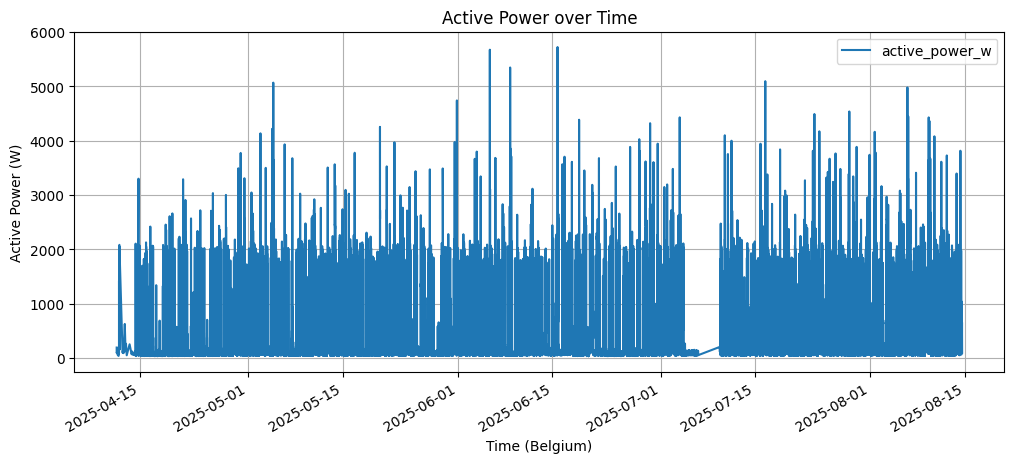

In [6]:
import matplotlib.pyplot as plt

# Optional: sort by time
df_sorted = df.sort_values("created_at_be")

# Plot
df_sorted.plot(
    x="created_at_be",
    y="active_power_w",
    kind="line",
    title="Active Power over Time",
    figsize=(12, 5)
)
plt.xlabel("Time (Belgium)")
plt.ylabel("Active Power (W)")
plt.grid(True)
#plt.tight_layout()
plt.show()

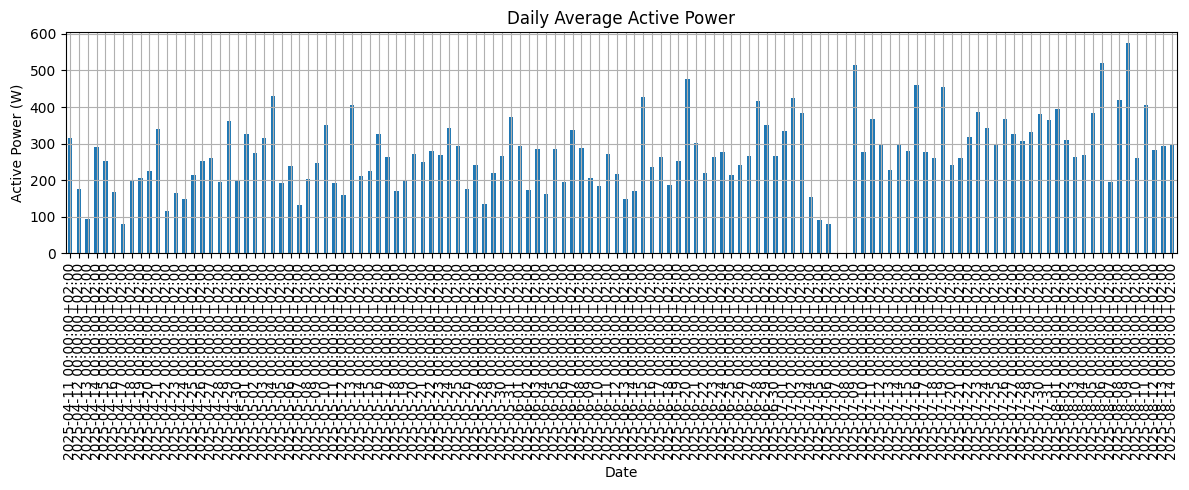

In [9]:
# Resample by day (or 'H' for hourly), and compute the mean power
df_daily = df_sorted.set_index("created_at_be").resample("D").mean(numeric_only=True)

# Plot as bar chart
df_daily.plot(
    y="active_power_w",
    kind="bar",
    title="Daily Average Active Power",
    figsize=(12, 5),
    legend=False
)
plt.xlabel("Date")
plt.ylabel("Active Power (W)")
plt.grid(True)
plt.tight_layout()
plt.show()